## Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.<br>
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv('kc_house_data.csv', encoding='latin-1')

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


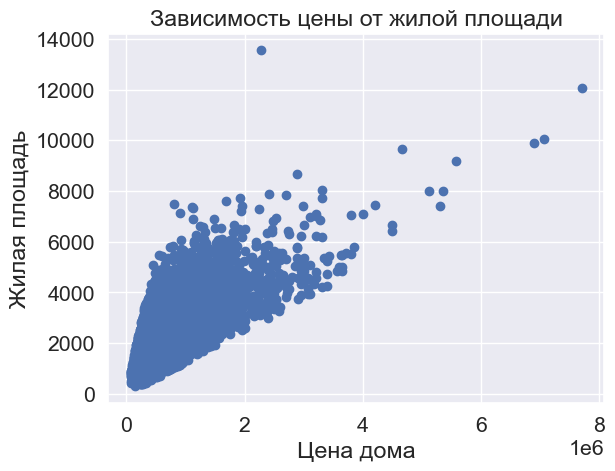

In [78]:
plt.xlabel('Цена дома')
plt.ylabel('Жилая площадь')
plt.title('Зависимость цены от жилой площади')
plt.scatter(x=df['price'], y=df['sqft_living']);

Зависимость цены от жилой площади заметная. Чем больше площадь - тем больше цена, но с некоторыми выбросами.

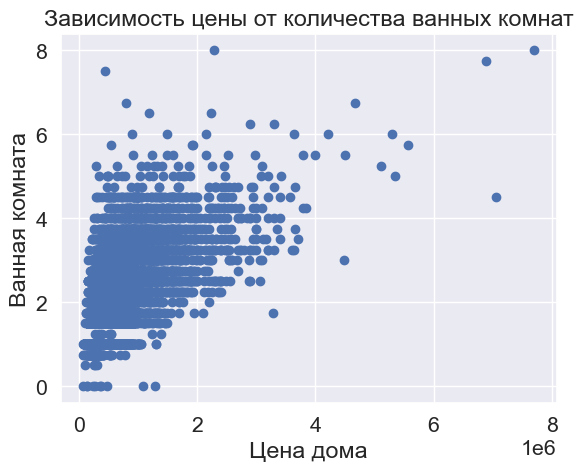

In [82]:
plt.xlabel('Цена дома')
plt.ylabel('Ванная комната')
plt.title('Зависимость цены от количества ванных комнат')
plt.scatter(x=df['price'], y=df['bathrooms']);

От количества ванных комнат стоимость жилья очень слабо зависит, но небольшое влияние есть(возможно совпадение из-за третьего признака).

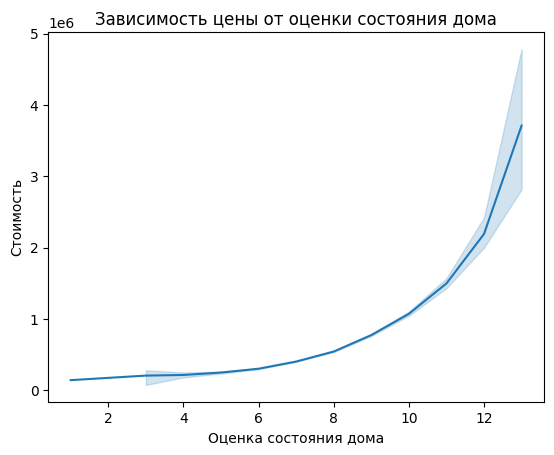

In [26]:
sns.lineplot(x=df['grade'], y=df['price']);
plt.xlabel('Оценка состояния дома')
plt.ylabel('Стоимость')
plt.title('Зависимость цены от оценки состояния дома');

Стоимость плавно поднимается до оценки 9. Дальше чуть сильнее, а после 11 резко идёт вверх.

In [63]:
data1 = df['price'][df['waterfront'] == 1]
data2 = df['price'][df['waterfront'] == 0]

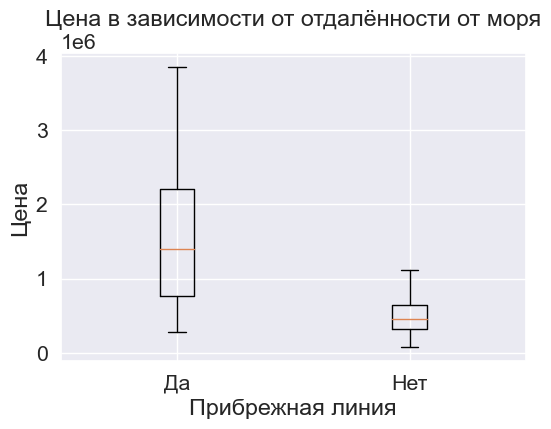

In [64]:
plt.figure(figsize=(6, 4))

plt.boxplot([data1, data2], showfliers=False)

plt.title('Цена в зависимости от отдалённости от моря')
plt.xlabel('Прибрежная линия')
plt.ylabel('Цена')
plt.xticks([1, 2], ['Да', 'Нет']);

Цена на дом сильно отличается в зависимости от отдалённости от моря. Дома которые находятся на прибрежной линии - стоят примерно от 750 000 и выше. Расположенные далеко от моря - до 650 000, если не считать выбросы.

In [65]:
data1 = df['price'][df['view'] == 1]
data2 = df['price'][df['view'] == 0]
data1.head()

282    2050000.0
394    1118000.0
472    1199000.0
489    1280000.0
491     370000.0
Name: price, dtype: float64

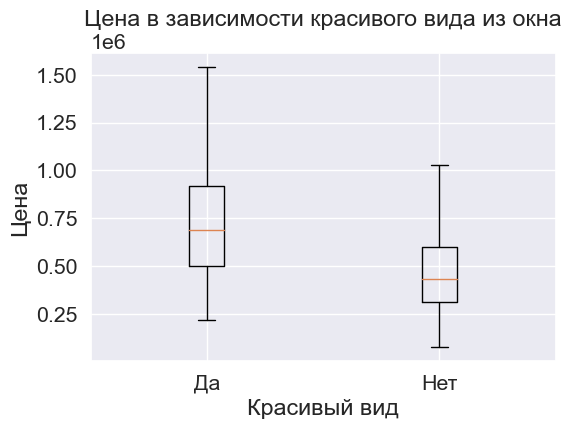

In [67]:
plt.figure(figsize=(6, 4))

plt.boxplot([data1, data2], showfliers=False)

plt.title('Цена в зависимости красивого вида из окна')
plt.xlabel('Красивый вид')
plt.ylabel('Цена')
plt.xticks([1, 2], ['Да', 'Нет']);

В среднем цена за дом с красивым видом выше.

#### Вывод
Цена сильно зависит от прибрежной линии и оценки состояния дома. Среднее влияние на цену оказывает красивый вид и чуть меньше жилая площадь. Почти никакого влияния не оказывает количество ванных комнат(возможно есть третий признак, как площадь, например, из-за которой больше ванных и цена в этих случаях скорее зависит от площади).